# Avaliação 02 - Introdução ao Aprendizado de Máquina (ENGG67)

**Discentes:**

- **Gabriel Souza de Andrade**

- **Yago Cunha Martins Rodrigues**

### 1 -  Utilizando o banco de dados “Iris Flower Data Set”, aborde o problema declassificação utilizando o algoritmo k-NN. Implemente a classificação em Jupyter Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df = pd.DataFrame(iris.target, columns=["species"])
target_df = pd.DataFrame(iris.target, columns=["target_value"])
iris_df = iris_df.replace([0,1,2], iris.target_names)
df = pd.concat([df, iris_df], axis=1)
df = pd.concat([df, target_df], axis=1)
df.head() # 5 primeiras linhas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target_value
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [3]:
df.groupby('species').size()
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_value
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Visualização

## Boxplot

<Figure size 640x480 with 0 Axes>

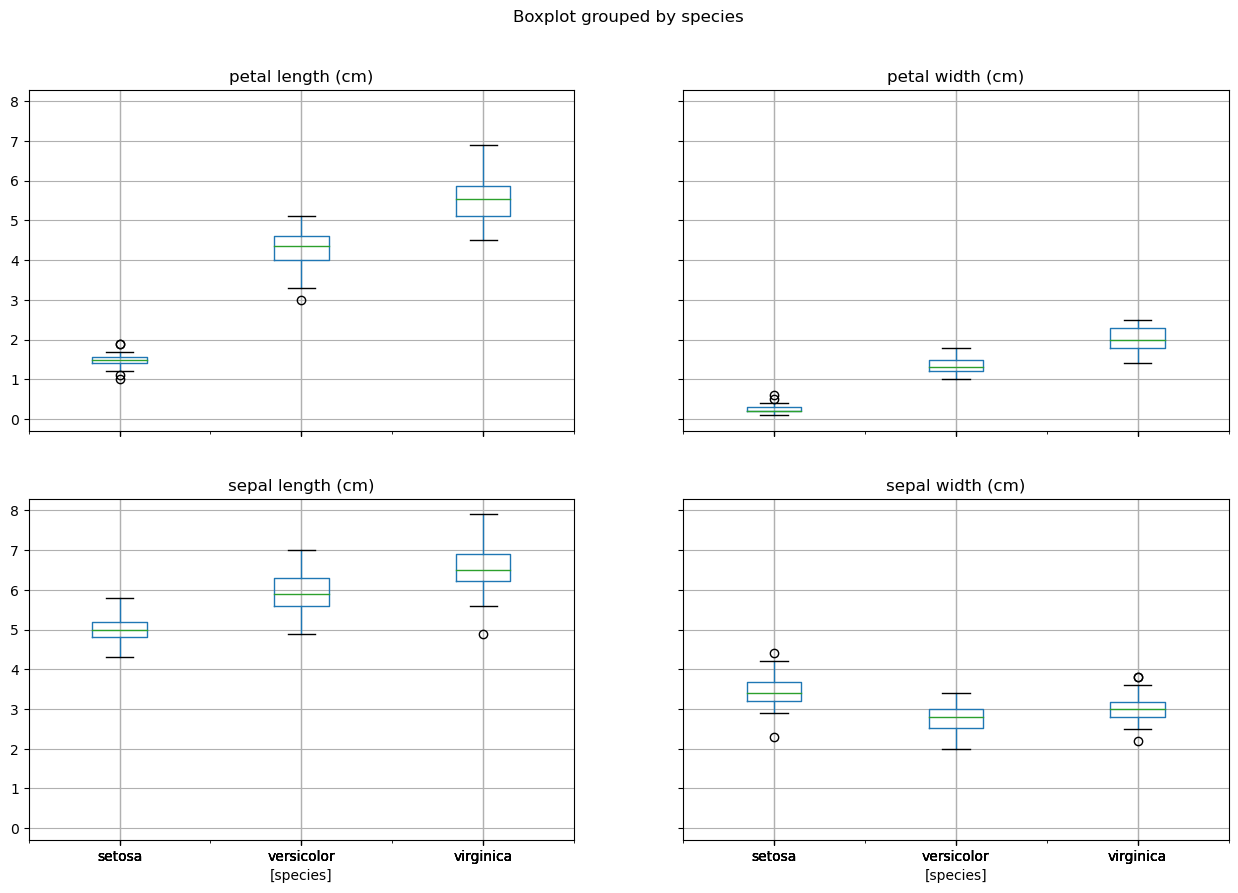

In [4]:
plt.figure()
ax = df[df.columns[:-1]].boxplot(by="species", figsize=(15, 10))
plt.show()

## Parallel Coordinates Plot

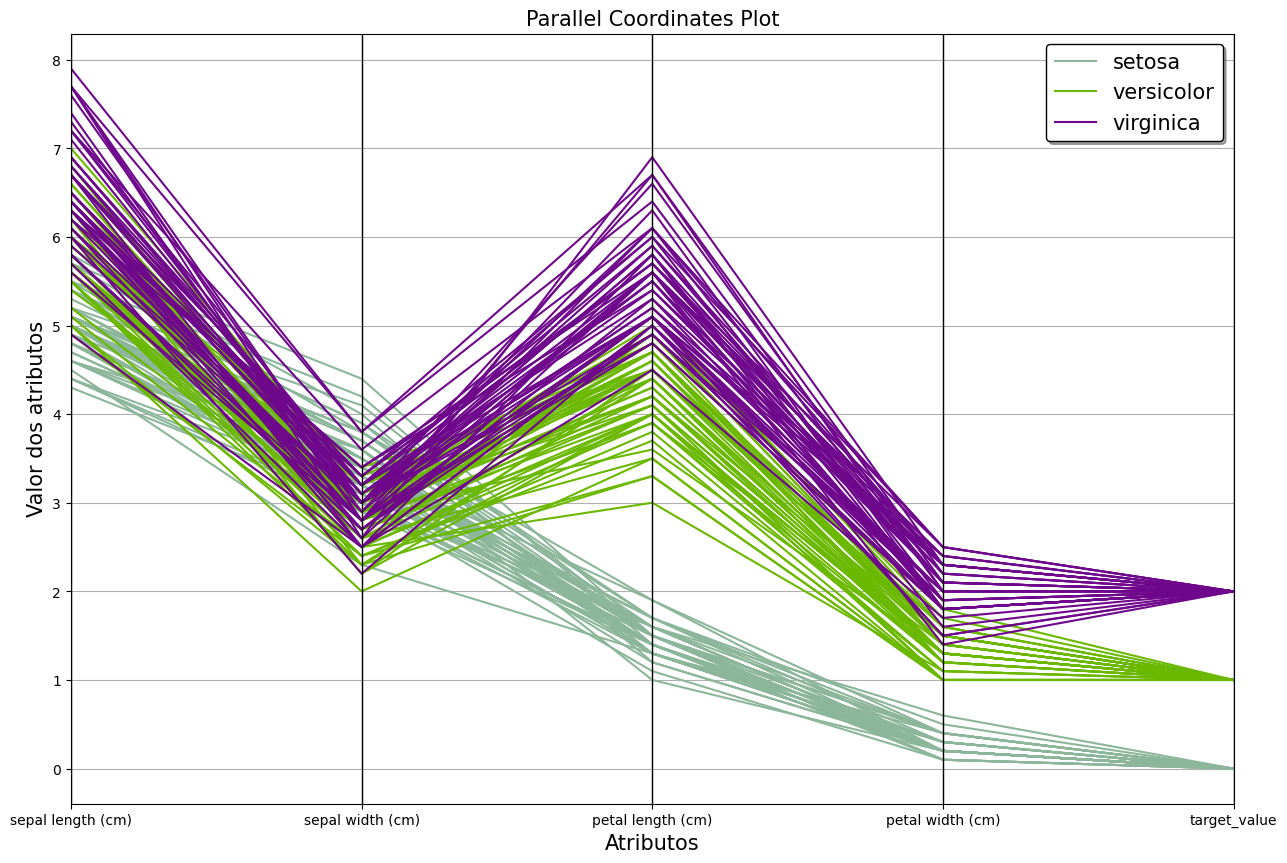

In [5]:
plt.figure(figsize=(15,10))
parallel_coordinates(df, "species")
plt.title('Parallel Coordinates Plot', fontsize=15)
plt.xlabel('Atributos', fontsize=15)
plt.ylabel('Valor dos atributos', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show(block=False);

## Andrews Curve

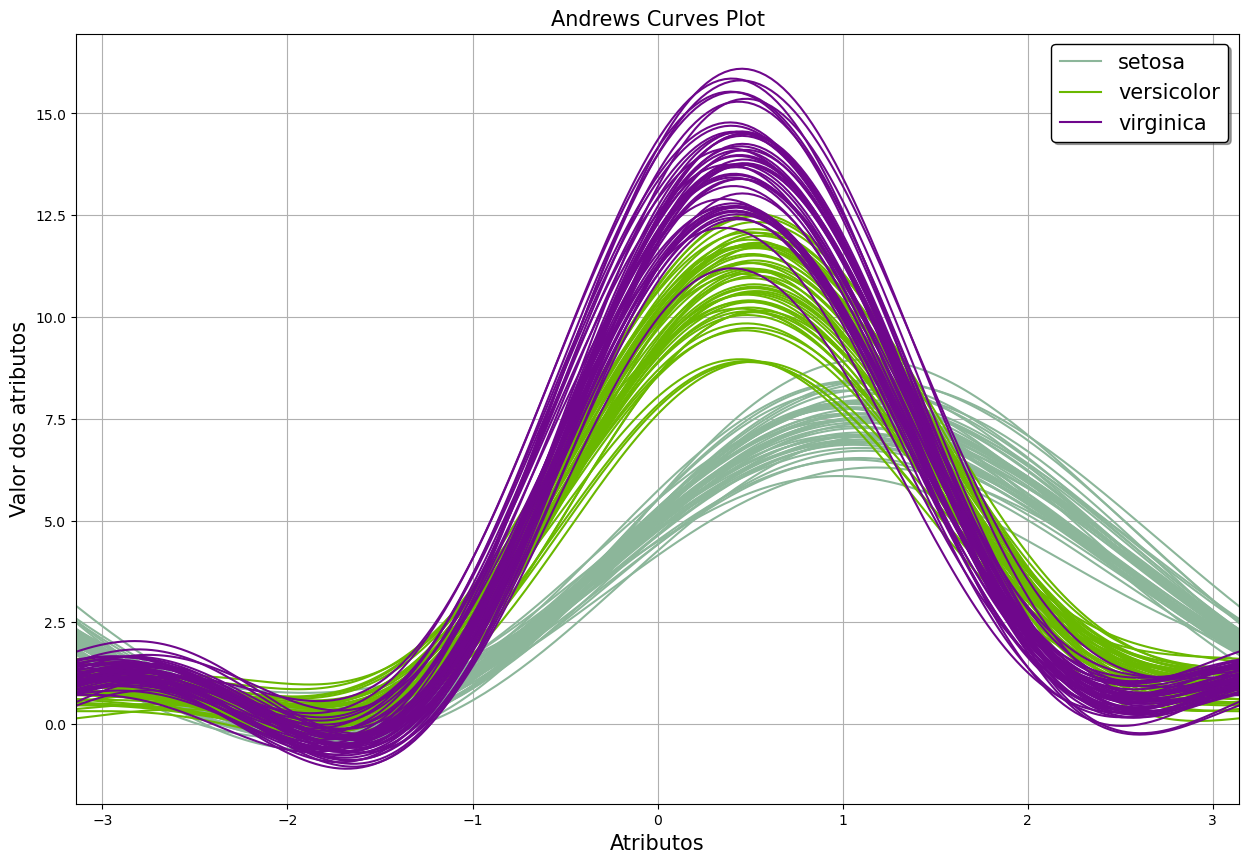

In [6]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(df, "species")
plt.title('Andrews Curves Plot', fontsize=15)
plt.xlabel('Atributos', fontsize=15)
plt.ylabel('Valor dos atributos', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

dados de treino = 20%

## Classificação

In [7]:
X = df[df.columns[:-2]].values
y = df['species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
k = 2
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Matriz de confusão

In [9]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

## Validação

In [10]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Precisão do modelo para k = {k} é {str(round(accuracy, 2))} %.")

Precisão do modelo para k = 2 é 96.67 %.


Para verificar o slider e ver a precisão com diferentes valores de K é necessário habilitar a extensão do jupyter através do seguinte comando : 

jupyter nbextension enable --py widgetsnbextension

In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

@interact
def set_k_neighbors(k=(1,100,1)):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f"Precisão do modelo para k = {k} é {str(round(accuracy, 2))} %.")

interactive(children=(IntSlider(value=50, description='k', min=1), Output()), _dom_classes=('widget-interact',…